# **Cinemática de un robot planar**

**Docente:** PhD Jorge Rudas

**Diseño de prototipos - 2025 I**

**INFOTEP**

## Importar librerias

In [1]:
import numpy as np
from sympy import*
init_printing()

## Se crean variables simbólicas

In [2]:
## Variables Simbolicas
theta_1 = symbols("theta_1",  real=True)
theta_2 = symbols("theta_2",  real=True)
l_1 = symbols("l_1",  real=True)
l_2 = symbols("l_2",  real=True)

## Transformación desde el estado 0 al estado 1

In [ ]:
_0H1 = Matrix([[cos(theta_1), -sin(theta_1), 0, 0], [sin(theta_1), cos(theta_1), 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])

In [ ]:
_0H1


⎡cos(θ₁)  -sin(θ₁)  0  0⎤
⎢                       ⎥
⎢sin(θ₁)  cos(θ₁)   0  0⎥
⎢                       ⎥
⎢   0        0      1  0⎥
⎢                       ⎥
⎣   0        0      0  1⎦

## Transformación desde el estado 1 al estado 2

In [ ]:
_1H2 = Matrix([[1, 0, 0, l_1], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])

In [ ]:
_1H2

⎡1  0  0  l₁⎤
⎢           ⎥
⎢0  1  0  0 ⎥
⎢           ⎥
⎢0  0  1  0 ⎥
⎢           ⎥
⎣0  0  0  1 ⎦

## Transformación desde el estado 2 al estado 3

In [ ]:
_2H3 = Matrix([[cos(theta_2), -sin(theta_2), 0, 0], [sin(theta_2), cos(theta_2), 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])

In [ ]:
_2H3

⎡cos(θ₂)  -sin(θ₂)  0  0⎤
⎢                       ⎥
⎢sin(θ₂)  cos(θ₂)   0  0⎥
⎢                       ⎥
⎢   0        0      1  0⎥
⎢                       ⎥
⎣   0        0      0  1⎦

## Transformación desde el estado 3 al estado 4

In [ ]:
_3H4 = Matrix([[1, 0, 0, l_2], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])

In [ ]:
_3H4


⎡1  0  0  l₂⎤
⎢           ⎥
⎢0  1  0  0 ⎥
⎢           ⎥
⎢0  0  1  0 ⎥
⎢           ⎥
⎣0  0  0  1 ⎦

## Composición de cada estado de la cinemática

In [ ]:
H = simplify(_0H1@_1H2@_2H3@_3H4)

In [ ]:
H

⎡cos(θ₁ + θ₂)  -sin(θ₁ + θ₂)  0  l₁⋅cos(θ₁) + l₂⋅cos(θ₁ + θ₂)⎤
⎢                                                            ⎥
⎢sin(θ₁ + θ₂)  cos(θ₁ + θ₂)   0  l₁⋅sin(θ₁) + l₂⋅sin(θ₁ + θ₂)⎥
⎢                                                            ⎥
⎢     0              0        1               0              ⎥
⎢                                                            ⎥
⎣     0              0        0               1              ⎦

## Posición del efector final

In [ ]:
P = H[0:2, 3]

In [ ]:
P

⎡l₁⋅cos(θ₁) + l₂⋅cos(θ₁ + θ₂)⎤
⎢                            ⎥
⎣l₁⋅sin(θ₁) + l₂⋅sin(θ₁ + θ₂)⎦

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def dibujar_brazo_mecanico(theta1, theta2, l1, l2):
  """Función para dibujar un brazo mecanico con 2 grados de libertad.

  Parametros:
    theta1: Angulo de la primera articulacion en radianes.
    theta2: Angulo de la segunda articulacion en radianes.
    l1: Longitud del primer extremo
    l2: Longitud del segundo extremo
  """

  # Calculamos la posición del efector final
  x1 = l1 * np.cos(theta1)
  y1 = l1 * np.sin(theta1)
  x2 = x1 + l2 * np.cos(theta1 + theta2)
  y2 = y1 + l2 * np.sin(theta1 + theta2)

  # Dibujando el brazo con lineas y puntos
  plt.figure(figsize=(6, 6))
  plt.plot([0, x1], [0, y1], 'b-', linewidth=5)  # First link
  plt.plot([x1, x2], [y1, y2], 'b-', linewidth=5)  # Second link
  plt.plot(0, 0, 'ro', markersize=10)  # Base
  plt.plot(x2, y2, 'go', markersize=10)  # End-effector

  # Se dibujan los límites y los labels
  plt.xlim([-l1 - l2, l1 + l2])
  plt.ylim([-l1 - l2, l1 + l2])
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title('Brazo robótico')
  plt.grid(True)
  plt.show()

## Ejemplo de manipulación del brazo robotico en su estado final

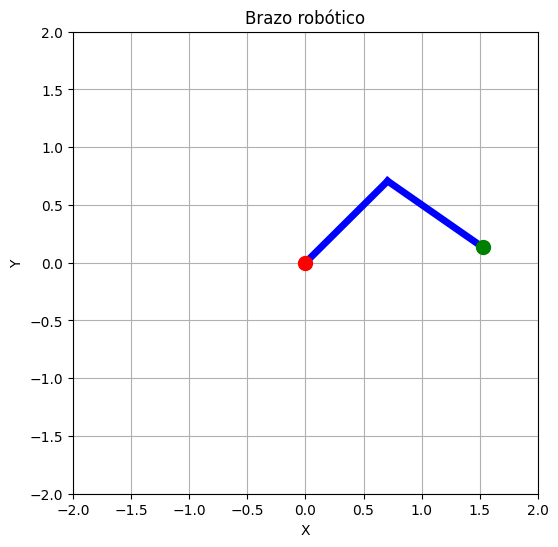

In [ ]:
theta1 = np.deg2rad(45)  # 45 grados
theta2 = np.deg2rad(-80)  # -30 grados
l1 = 1
l2 = 1
dibujar_brazo_mecanico(theta1, theta2, l1, l2)

## **Taller**

*  Dibujar cada estado del anterior brazo robótico
*  Imagine un brazo robótico cuyas extremidades miden 2 unidades cada una. Podría este brazo alcanzar cualquier objeto dentro de la cuadricula de 2 x 2? Explique detalladamente su razonamiento

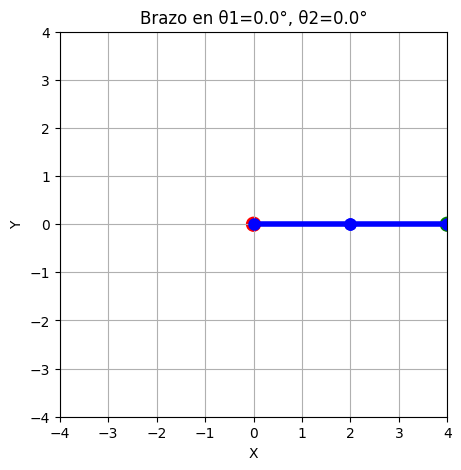

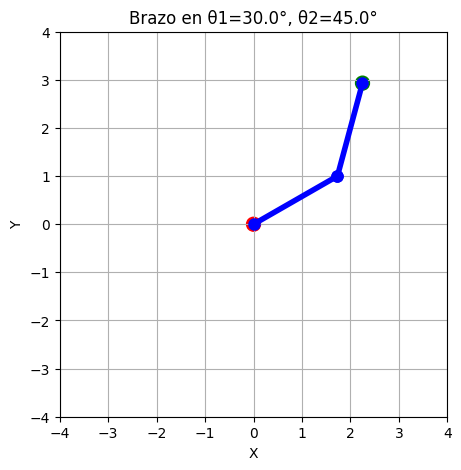

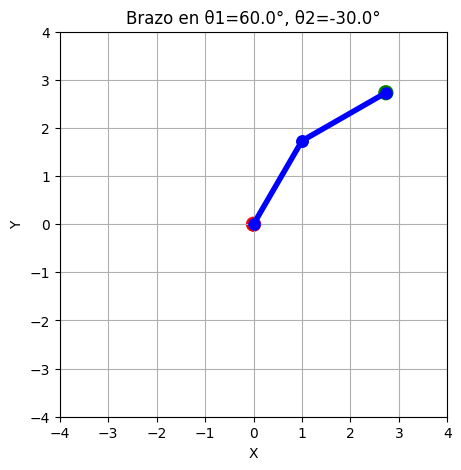

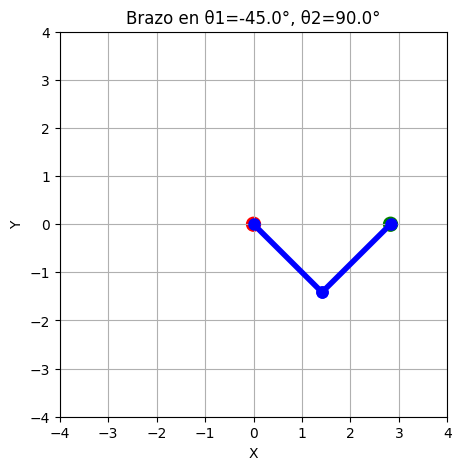

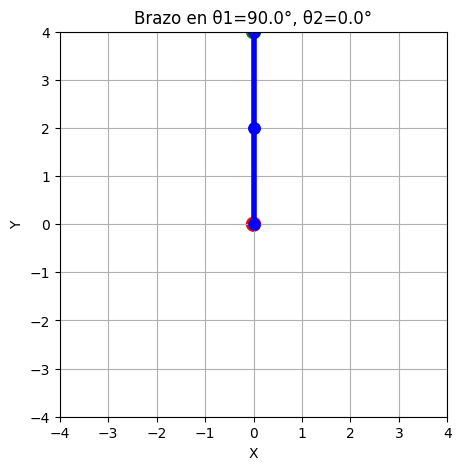

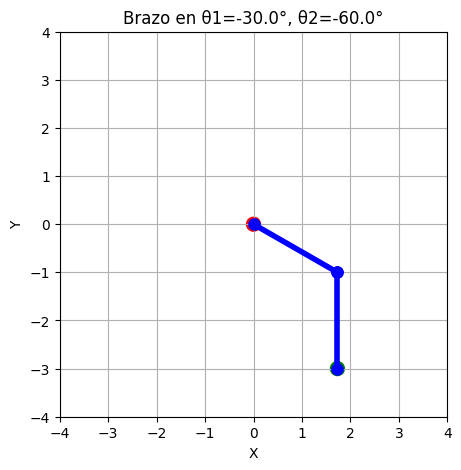

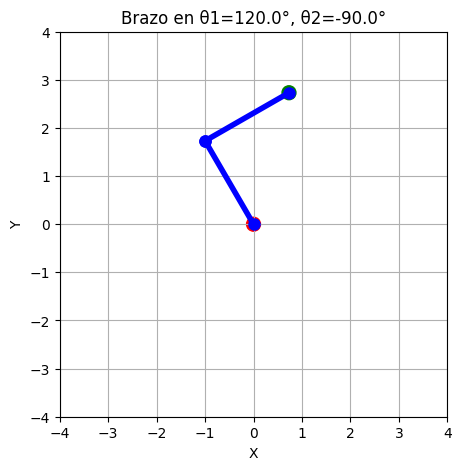

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def forward_kinematics(theta1, theta2, l1=2, l2=2):
    """ Calcula las posiciones del brazo robótico en base a los ángulos de sus articulaciones """
    x0, y0 = 0, 0


    x1 = l1 * np.cos(theta1)
    y1 = l1 * np.sin(theta1)


    x2 = x1 + l2 * np.cos(theta1 + theta2)
    y2 = y1 + l2 * np.sin(theta1 + theta2)

    return x1, y1, x2, y2

def plot_robot(theta1, theta2, l1=2, l2=2):
    """ Dibuja el brazo robótico en una configuración específica """
    x1, y1, x2, y2 = forward_kinematics(theta1, theta2, l1, l2)

    plt.figure(figsize=(5,5))
    plt.plot([0, x1], [0, y1], 'bo-', linewidth=4, markersize=8)
    plt.plot([x1, x2], [y1, y2], 'bo-', linewidth=4, markersize=8)
    plt.scatter([0, x2], [0, y2], c=['red', 'green'], s=100)

    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"Brazo en θ1={np.degrees(theta1):.1f}°, θ2={np.degrees(theta2):.1f}°")
    plt.grid()
    plt.show()


angles = [(0, 0), (30, 45), (60, -30), (-45, 90), (90, 0), (-30, -60), (120, -90)]
for theta1, theta2 in angles:
    plot_robot(np.radians(theta1), np.radians(theta2))


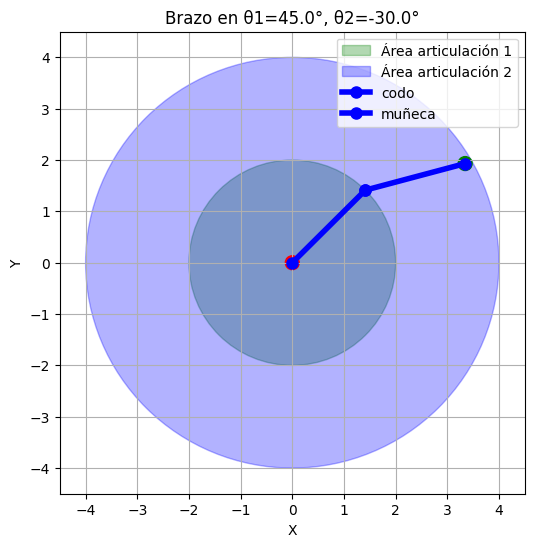

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def forward_kinematics(theta1, theta2, l1=2, l2=2):
    """ Calcula las posiciones del brazo robótico en base a los ángulos de sus articulaciones """
    x0, y0 = 0, 0


    x1 = l1 * np.cos(theta1)
    y1 = l1 * np.sin(theta1)


    x2 = x1 + l2 * np.cos(theta1 + theta2)
    y2 = y1 + l2 * np.sin(theta1 + theta2)

    return x1, y1, x2, y2

def plot_robot(theta1, theta2, l1=2, l2=2):
    """ Dibuja el brazo robótico en una configuración específica """
    x1, y1, x2, y2 = forward_kinematics(theta1, theta2, l1, l2)

    plt.figure(figsize=(6,6))


    reach_circle_1 = plt.Circle((0, 0), l1, color='green', alpha=0.3, label='Área articulación 1')
    reach_circle_2 = plt.Circle((0, 0), l1 + l2, color='blue', alpha=0.3, label='Área articulación 2')
    ax = plt.gca()
    ax.add_patch(reach_circle_1)
    ax.add_patch(reach_circle_2)

    plt.plot([0, x1], [0, y1], 'bo-', linewidth=4, markersize=8, label='codo')
    plt.plot([x1, x2], [y1, y2], 'bo-', linewidth=4, markersize=8, label='muñeca')
    plt.scatter([0, x2], [0, y2], c=['red', 'green'], s=100)  # Base y extremo


    plt.xlim(-4.5, 4.5)
    plt.ylim(-4.5, 4.5)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"Brazo en θ1={np.degrees(theta1):.1f}°, θ2={np.degrees(theta2):.1f}°")
    plt.legend(loc='upper right')
    plt.grid()
    plt.show()


theta1, theta2 = np.radians(45), np.radians(-30)
plot_robot(theta1, theta2)